<a href="https://colab.research.google.com/github/arjunjyothieswarb/CS5180/blob/main/ex0_starter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Please install the following python libraries
- python3: https://www.python.org/
- numpy: https://numpy.org/install/
- tqdm: https://github.com/tqdm/tqdm#installation
- matplotlib: https://matplotlib.org/stable/users/installing/index.html
- ipywidgets and ipykernel if necessary
- Starter Code was tested on Python 3.11.5

In [2]:
import random
import numpy as np
import tqdm.notebook as tqdm
import matplotlib.pyplot as plt
import ipywidgets as widgets
from tqdm import tqdm


# 1: Complete the Implementation of the Four Rooms environment

- The FourRooms is implemented as a python class. We explain the attributes and methods as follows
    - **init** function: Define all the attributes of the Four Rooms environment. For example, the state space, the action space, the start state, the goal state and so on.
    - **reset** function: Resets the agent to the start state (0, 0)
    - **step** function: Takes the current state and one action, returns the next state and a reward
   
- Please complete the implementation in the step function.

In [3]:
# FOUR ROOM ENVIRONMENT
class FourRooms(object):
    def __init__(self):
        # define the four room as a 2-D array for easy state space reference and visualization
        # 0 represents an empty cell; 1 represents a wall cell
        self.four_room_space = np.array([[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                                         [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                         [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                                         [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                                         [1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0],
                                         [0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1],
                                         [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                                         [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                         [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]])

        # find the positions for all empty cells
        # not that: the origin for a 2-D numpy array is located at top-left while the origin for the FourRooms is at
        # the bottom-left. The following codes performs the re-projection.
        empty_cells = np.where(self.four_room_space == 0.0)
        self.state_space = [[col, 10 - row] for row, col in zip(empty_cells[0], empty_cells[1])]

        # define the action space
        self.action_space = {'LEFT': np.array([-1, 0]),
                             'RIGHT': np.array([1, 0]),
                             'DOWN': np.array([0, -1]),
                             'UP': np.array([0, 1])}

        self.actions_possible = {
            "UP": [[0,1],[-1,0],[1,0]],
            "DOWN": [[0,-1],[-1,0],[1,0]],
            "LEFT":[[-1,0],[0,1],[0,-1]],
            "RIGHT":[[1,0],[0,1],[0,-1]]
        }

        # define the start state
        self.start_state = [0, 0]

        # define the goal state
        self.goal_state = [10, 10]


    def reset(self):
        """
        Reset the agent's state to the start state [0, 0]
        Return both the start state and reward
        """
        state = self.start_state  # reset the agent to [0, 0]
        reward = 0  # reward is 0
        return state, reward


    def step(self, state, act):
        """
        Args:
            state: a list variable containing x, y integer coordinates. (i.e., [1, 1]).
            act: a string variable (i.e., "UP"). All feasible values are ["UP", "DOWN", "LEFT", "RIGHT"].
        Output args:
            next_state: a list variable containing x, y integer coordinates (i.e., [1, 1])
            reward: an integer. it can be either 0 or 1.
        """

        # CODE HERE: implement the stochastic dynamics as described in Q1.
        # Please note, we provide you with the deterministic transition function "take_action" below.
        # Therefore, you only have to implement the logics of the stochasticity.
        if(state[0] == 10 and state[1] == 10):
            self.reset()

        movement_stochastic = [0.8, 0.9, 1]

        rand_val = random.random()

        # Simulating noise
        if(rand_val<=movement_stochastic[0]):
            noise_selector = 0
        elif(rand_val<=movement_stochastic[1]):
            noise_selector = 1
        else:
            noise_selector = 2

        # print("\nNoise selected: ",noise_selector)

        # Calculating the next state given the current state and stochastic action taken
        est_next_state = [state[0] + self.actions_possible[act][noise_selector][0], state[1] + self.actions_possible[act][noise_selector][1]]

        # Checking wether action is possible
        if(est_next_state[0] > 10 or est_next_state[1] > 10 or est_next_state[0] < 0 or est_next_state[1] < 0):
            next_state = state
        elif(self.four_room_space[est_next_state[0], est_next_state[1]]):
            next_state = state
        else:
            next_state = est_next_state


        # CODE HERE: compute the reward based on the resulting state
        if(next_state[0] == 10 and next_state[1] == 10):
            reward = 1
        else:
            reward = 0

        # return the current state, reward
        return next_state, reward


    """ DO NOT CHANGE BELOW """
    def take_action(self, state, act):
        """
        Input args:
            state (list): a list variable containing x, y integer coordinates. (i.e., [1, 1]).
            act (string): a string variable (i.e., "UP"). All feasible values are ["UP", "DOWN", "LEFT", "RIGHT"].
        Output args:
            next_state (list): a list variable containing x, y integer coordinates (i.e., [1, 1])
        """
        state = np.array(state)
        next_state = state + self.action_space[act]
        return next_state.tolist() if next_state.tolist() in self.state_space else state.tolist()

In [4]:
"""Here is the plot function you can use to generate the figure. DO NOT CHANGE"""
# PLOT FUNCTION
def plot_func(res_list):
    # set the figure size
    plt.figure(figsize=(8, 6))

    # plot each trial
    for re in res_list:
        plt.plot(list(range(len(res_list[0]))), re, linestyle="--", linewidth=1, alpha=0.7)

    # plot mean reward
    mean_reward = np.array(res_list).mean(axis=0).tolist()
    plt.plot(list(range(len(res_list[0]))), mean_reward, linestyle="-", linewidth=2, color="k")

    # plot the figure
    plt.ylabel("Cumulative reward")
    plt.xlabel("Time step")
    plt.show()

# 2 Implement the manual policy

Use this to check your whether your implementation of the step function is correct.

In [6]:
if __name__ == "__main__":
    # fix the randomness for reproduction
    random.seed(1234)
    np.random.seed(1234)

    # create the environment
    env = FourRooms()
    state, reward = env.reset()  # always call reset() before interaction

    # manual time step (YOU CAN CHANGE THIS TO ANY TIME STEP YOU WANT)
    time_step = 100

    # create a loop
    for t in range(time_step):

        # CODE HERE: implement your manual agent/policy function that takes in the action from the standard input
        val = input("1: UP\n2: DOWN\n3: RIGHT\n4:LEFT\n")
        if(val == "1"):
            action = "UP"
        elif(val == "2"):
            action = "DOWN"
        elif(val == "3"):
            action = "RIGHT"
        elif(val == "4"):
            action = "LEFT"
        else:
            print("Quitting!")
            break
            # action = None
        # action = None

        # CODE HERE: implement the code to interact with the Four Rooms environment above.
        # it should takes in the current state and action and returns the next_state and a reward
        # Hint: use the step function that you implement.
        next_state, reward = env.step(state,action)
        # next_state, reward = None, None

        """DO NOT CHANGE BELOW"""
        # print interaction
        print(f"Step = {t}, state = {state}, action = {action}, next state = {next_state}, reward = {reward}")

        # reset if the agent reaches the goal
        if reward == 1:
            print("Reset the agent to the start state!")
            state, reward = env.reset()
        else:
            state = next_state

1: UP
2: DOWN
3: RIGHT
4:LEFT
1
Step = 0, state = [0, 0], action = UP, next state = [1, 0], reward = 0
1: UP
2: DOWN
3: RIGHT
4:LEFT
1
Step = 1, state = [1, 0], action = UP, next state = [1, 1], reward = 0
1: UP
2: DOWN
3: RIGHT
4:LEFT
1
Step = 2, state = [1, 1], action = UP, next state = [1, 2], reward = 0
1: UP
2: DOWN
3: RIGHT
4:LEFT
1
Step = 3, state = [1, 2], action = UP, next state = [2, 2], reward = 0
1: UP
2: DOWN
3: RIGHT
4:LEFT
1
Step = 4, state = [2, 2], action = UP, next state = [3, 2], reward = 0
1: UP
2: DOWN
3: RIGHT
4:LEFT
1
Step = 5, state = [3, 2], action = UP, next state = [3, 3], reward = 0
1: UP
2: DOWN
3: RIGHT
4:LEFT
1
Step = 6, state = [3, 3], action = UP, next state = [3, 4], reward = 0
1: UP
2: DOWN
3: RIGHT
4:LEFT
3
Step = 7, state = [3, 4], action = RIGHT, next state = [4, 4], reward = 0
1: UP
2: DOWN
3: RIGHT
4:LEFT
1
Step = 8, state = [4, 4], action = UP, next state = [4, 4], reward = 0
1: UP
2: DOWN
3: RIGHT
4:LEFT
1
Step = 9, state = [4, 4], action = UP,

# 3 Implement a random policy

We provide the scaffolding code for running and plotting. Please implement a random policy

**Please note: you should read the code carefully before implementing to make sure the variable names are aligned.**

Episode:   0%|          | 0/10000 [00:00<?, ?it/s]
                                                  
Episode:   0%|          | 0/10000 [00:00<?, ?it/s]
                                                  
Episode:   0%|          | 0/10000 [00:00<?, ?it/s]
                                                  
Episode:   0%|          | 0/10000 [00:00<?, ?it/s]
                                                  
Episode:   0%|          | 0/10000 [00:00<?, ?it/s]
                                                  
Episode:   0%|          | 0/10000 [00:00<?, ?it/s]
                                                  
Run trial: 100%|██████████| 10/10 [00:00<00:00, 17.09it/s]


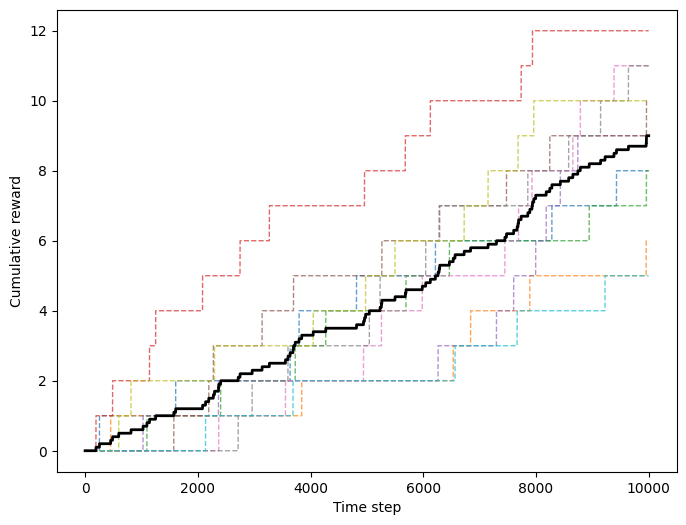

In [7]:
if __name__ == "__main__":
    # fix the randomness for reproduction
    random.seed(1234)
    np.random.seed(1234)

    # create the environment
    env = FourRooms()

    # number of the trail (YOU CAN MODIFIED HERE WITH SMALL VALUES FOR DEBUG ONLY)
    trial_num = 10
    # length of each trail (YOU CAN MODIFIED HERE WITH SMALL VALUES FOR DEBUG ONLY)
    trial_length = int(1e4)

    # save the rewards for plot
    rewards_list = []

    # run experiment
    for e in tqdm(range(trial_num), desc="Run trial",position=0):

        # reset for every trail
        reward_per_trial = []
        reward_counter = 0

        # reset the environment
        state, reward = env.reset()

        # run each trial
        for t in tqdm(range(trial_length), desc="Episode", position=1, leave=False):


            # CODE HERE: please implement a random policy to obtain an action.
            # it should return a random action from ["UP", "DOWN", "LEFT", "RIGHT"]

            # Generating a random number
            val = random.random()

            # Chosing the action taken randomly
            if(val<=1/4):
                action = "UP"
            elif(val<=1/2):
                action = "DOWN"
            elif(val<=3/4):
                action = "LEFT"
            else:
                action = "RIGHT"
            # action = None

            # CODE HERE: please implement the code to get the next state and reward
            # it should takes in the current state and action
            # it should returns the next_state and reward
            next_state, reward = env.step(state,action)
            # next_state, reward = None, None


            """DO NOT CHANGE BELOW"""
            # save the reward
            reward_counter += reward
            reward_per_trial.append(reward_counter)

            # reset
            if reward == 1:
                state, reward = env.reset()
            else:
                state = next_state

        # save the rewards
        rewards_list.append(reward_per_trial)

# PLOT THE RESULTS
plot_func(rewards_list)

# 4 Implement better & worse policies against the Random Policy

In [7]:
class worse_policy():
    def __init__(self):
        self.action_set = ["UP", "DOWN", "RIGHT", "LEFT"]
        self.counter = 0

    def return_action(self):
        action = self.action_set[self.counter]
        if(self.counter == 3):
            self.counter = 0
        else:
            self.counter = self.counter + 1
        return action

In [13]:
class better_policy():
    def __init__(self):
        self.action_set = ["UP", "DOWN", "RIGHT", "LEFT"]
        # self.selection

    def return_action(self):

        self.selection = random.random()
        if(self.selection <= 0.4):
            return self.action_set[0]
        elif(self.selection <= 0.8):
            return self.action_set[2]
        elif(self.selection <= 0.9):
            return self.action_set[1]
        else:
            return self.action_set[3]

Episode:   0%|          | 0/10000 [00:00<?, ?it/s]
                                                  
Episode:   0%|          | 0/10000 [00:00<?, ?it/s]
                                                  
Episode:   0%|          | 0/10000 [00:00<?, ?it/s]
                                                  
Episode:   0%|          | 0/10000 [00:00<?, ?it/s]
                                                  
Episode:   0%|          | 0/10000 [00:00<?, ?it/s]
                                                  
Run trial: 100%|██████████| 10/10 [00:00<00:00, 18.16it/s]


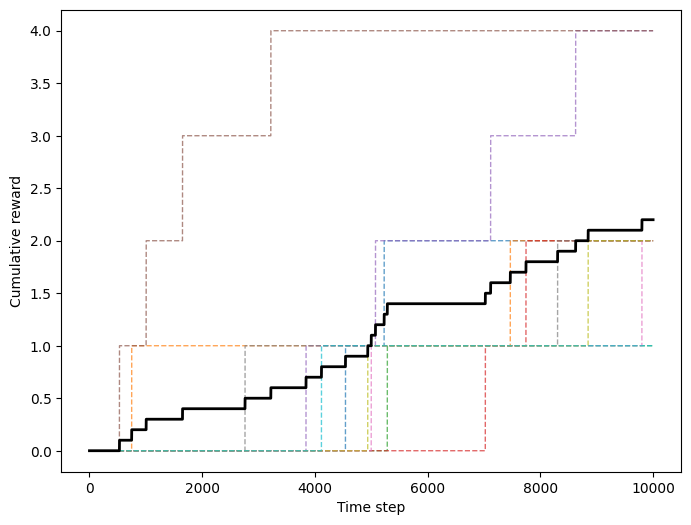

In [18]:
if __name__ == "__main__":
    # fix the randomness for reproduction
    random.seed(1234)
    np.random.seed(1234)

    # create the environment
    env = FourRooms()

    # number of the trail
    trial_num = 10
    # length of each trail
    trial_length = int(1e4)

    # save the rewards for plot
    rewards_list = []

    # run experiment
    for e in tqdm(range(trial_num), desc="Run trial",position=0):

        # reset for every trail
        reward_per_trial = []
        reward_counter = 0

        # reset the environment
        state, reward = env.reset()

        bp = better_policy()
        wp = worse_policy()

        # run each trial
        for t in tqdm(range(trial_length), desc="Episode", position=1, leave=False):


            # CODE HERE: please implement a policy that is worse than the random policy.
            # It should takes in the current state and output an action

            # This policy choses the action in a periodic manner
            # action = wp.return_action()
            action = wp.return_action()
            # action = None

            # CODE HERE: please implement the code to get the next state and reward
            next_state, reward = env.step(state,action)
            # next_state, reward = None, None


            """DO NOT CHANGE BELOW"""
            # save the reward
            reward_counter += reward
            reward_per_trial.append(reward_counter)

            # reset
            if reward == 1:
                state, reward = env.reset()
            else:
                state = next_state

        # save the rewards
        rewards_list.append(reward_per_trial)

# PLOT THE RESULTS
plot_func(rewards_list)